In [21]:
import pandas as pd
import os  
import numpy as np
import matplotlib.pyplot as plt

In [5]:
os.chdir("../data")
df= pd.read_csv("quejas-clientes.csv", sep=",", )
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1291006,Debt collection,NaN,Communication tactics,Frequent or repeated calls,TX,76119.0,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,NaN
1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479.0,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,NaN
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,MA,2127.0,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes
3,1291615,Credit card,NaN,Other,NaN,CA,92592.0,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,NaN
4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,NaN,43068.0,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201.0,2015-01-01,2015-01-02,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No
28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,GA,30043.0,2015-01-01,2015-01-07,DriveTime,Closed with explanation,Yes,NaN
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,MN,55105.0,2015-01-01,2015-01-02,Regions,Closed with non-monetary relief,Yes,No
28154,1178181,Payday loan,NaN,Can't stop charges to bank account,NaN,CA,92509.0,2015-01-01,2015-01-07,Moneytree Inc,Closed with explanation,Yes,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28156 entries, 0 to 28155
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Complaint ID          28156 non-null  int64  
 1   Product               28156 non-null  object 
 2   Sub-product           17582 non-null  object 
 3   Issue                 28154 non-null  object 
 4   Sub-issue             13211 non-null  object 
 5   State                 27735 non-null  object 
 6   ZIP code              27876 non-null  float64
 7   Date received         28156 non-null  object 
 8   Date sent to company  28156 non-null  object 
 9   Company               28156 non-null  object 
 10  Company response      28156 non-null  object 
 11  Timely response?      28156 non-null  object 
 12  Consumer disputed?    6006 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 2.8+ MB


In [7]:
sorted(df["State"].dropna().unique())



['AE',
 'AK',
 'AL',
 'AP',
 'AR',
 'AS',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MH',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'PW',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [81]:
df["State"].value_counts()

State
CA    3859
FL    2592
TX    2380
NY    1846
GA    1146
NJ    1113
PA    1055
IL    1003
OH     939
VA     869
MD     791
NC     764
MI     694
AZ     578
MA     512
WA     509
CO     483
TN     473
SC     441
MO     409
AL     358
NV     351
WI     351
OR     337
MN     311
IN     298
CT     287
LA     277
KY     225
OK     207
UT     176
KS     176
DC     168
MS     159
NM     155
DE     152
IA     141
AR     121
ME     115
ID     115
NH     111
NE     108
RI      89
HI      83
WV      70
PR      65
VT      55
SD      52
MT      41
ND      30
WY      30
AK      25
AP      17
AE       9
VI       7
GU       3
MH       2
PW       1
AS       1
Name: count, dtype: int64

<Axes: xlabel='State'>

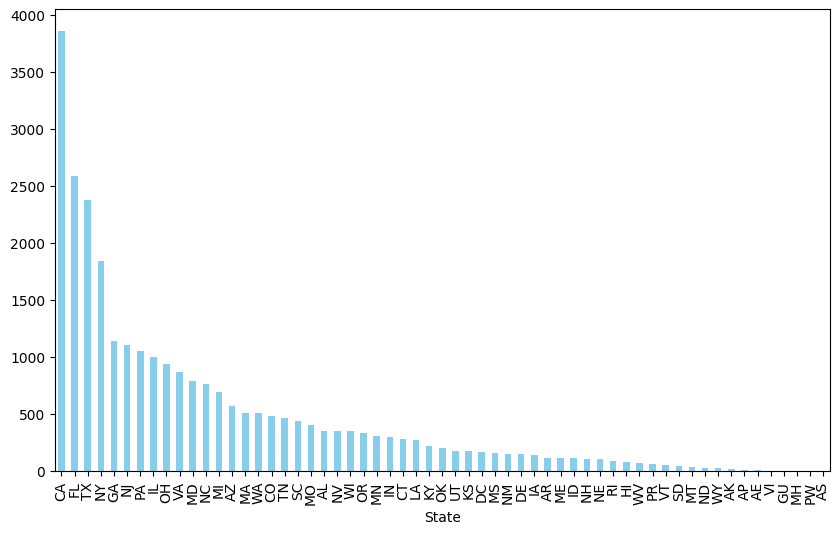

In [23]:
plt.figure(figsize=(10, 6))
df["State"].value_counts().plot(kind="bar", color="skyblue")

Son los 50 estados de EEUU, otros territorios controlados por el(	Puerto Rico, Islas Vírgenes, Guam, Samoa Americana, Islas Marshall, Palaos ) y dos designagiones militares (AE es europea, y AP del pacifico).


In [8]:
df["State"].dropna().value_counts().sort_values(ascending=False)

State
CA    3859
FL    2592
TX    2380
NY    1846
GA    1146
NJ    1113
PA    1055
IL    1003
OH     939
VA     869
MD     791
NC     764
MI     694
AZ     578
MA     512
WA     509
CO     483
TN     473
SC     441
MO     409
AL     358
NV     351
WI     351
OR     337
MN     311
IN     298
CT     287
LA     277
KY     225
OK     207
UT     176
KS     176
DC     168
MS     159
NM     155
DE     152
IA     141
AR     121
ME     115
ID     115
NH     111
NE     108
RI      89
HI      83
WV      70
PR      65
VT      55
SD      52
MT      41
ND      30
WY      30
AK      25
AP      17
AE       9
VI       7
GU       3
MH       2
PW       1
AS       1
Name: count, dtype: int64

Es posible que se eliminen los estados AP y AE ya que son bases militares y existen pocas quejas y son vinculantes.

In [ ]:
df["ZIP code"].value_counts()

ZIP code
76116.0    58
33173.0    39
33614.0    38
85032.0    37
60445.0    36
           ..
25003.0     1
14047.0     1
32008.0     1
15025.0     1
13619.0     1
Name: count, Length: 9868, dtype: int64

Parece que los codigos postales no son homogeneos. Hay como 9800 codigos distintos y algunos estan mas poblados que otros.

In [49]:
df["ZIP code"].value_counts().sum()

np.int64(27876)

In [53]:
(df[df["ZIP code"].isna()==True]["State"]).value_counts().sum()

np.int64(126)

In [65]:
print("estradas sin codigo postal:", len((df[df["ZIP code"].isna()==True]["Complaint ID"]).to_list()))
print(len((df[df["ZIP code"].isna()==True]["State"])))
df[df["ZIP code"].isna()]["State"].value_counts()

estradas sin codigo postal: 280
280


State
NV    67
CT    30
NY     5
TX     4
CA     3
FL     2
OH     2
NM     2
TN     1
NC     1
SC     1
MT     1
UT     1
ME     1
WY     1
GA     1
LA     1
MI     1
AK     1
Name: count, dtype: int64

In [59]:
print(len(df[df["State"].isna()==True]["ZIP code"].to_list()))
df[df["State"].isna()==True]["ZIP code"].to_list()

421


[43068.0,
 nan,
 33027.0,
 32174.0,
 95476.0,
 19468.0,
 75240.0,
 75240.0,
 20658.0,
 30344.0,
 30344.0,
 nan,
 18536.0,
 91752.0,
 23228.0,
 nan,
 74743.0,
 74743.0,
 80125.0,
 43452.0,
 30036.0,
 nan,
 43452.0,
 44305.0,
 72719.0,
 31632.0,
 nan,
 795.0,
 54880.0,
 54880.0,
 95948.0,
 95948.0,
 99001.0,
 47304.0,
 47304.0,
 67213.0,
 85614.0,
 960.0,
 nan,
 nan,
 9620.0,
 nan,
 28697.0,
 28697.0,
 94960.0,
 34769.0,
 33063.0,
 20004.0,
 95630.0,
 94960.0,
 nan,
 33166.0,
 12000.0,
 nan,
 7067.0,
 nan,
 nan,
 34778.0,
 77534.0,
 20.0,
 20.0,
 77534.0,
 nan,
 10011.0,
 98115.0,
 45342.0,
 98115.0,
 74432.0,
 86403.0,
 nan,
 53805.0,
 33144.0,
 33144.0,
 68776.0,
 78209.0,
 68776.0,
 98008.0,
 nan,
 nan,
 78209.0,
 nan,
 nan,
 nan,
 45245.0,
 89523.0,
 60612.0,
 45014.0,
 89523.0,
 707.0,
 nan,
 53240.0,
 nan,
 nan,
 34654.0,
 34654.0,
 95368.0,
 28278.0,
 95368.0,
 33189.0,
 33189.0,
 1128.0,
 1128.0,
 nan,
 35243.0,
 33615.0,
 33615.0,
 nan,
 7470.0,
 nan,
 70005.0,
 715.0,
 nan,
 na

Hay 280 entradas sin codigo postal de esos 126 si que tienen estado.
Hay varias que que no tienen estado pero si postal. Se podria intentar sacar el estado e  ignorar esta variable para evitar problemas de privacidad

In [10]:
df["Product"].value_counts()

Product
Debt collection            7494
Mortgage                   6612
Credit reporting           5717
Credit card                2830
Bank account or service    2609
Consumer loan              1314
Student loan                785
Payday loan                 348
Money transfers             232
Prepaid card                175
Other financial service      40
Name: count, dtype: int64

<Axes: xlabel='Product'>

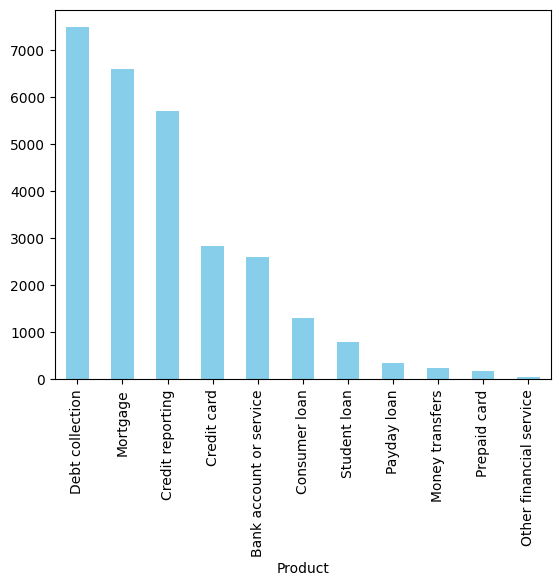

In [68]:
df["Product"].value_counts().plot(kind="bar", color="skyblue")

In [36]:
df["Product"].nunique()

11

In [11]:
df["Sub-product"].value_counts()

Sub-product
Conventional fixed mortgage               2446
Other (phone, health club, etc.)          2273
Other mortgage                            1954
Checking account                          1693
Credit card                               1447
Medical                                   1135
Non-federal student loan                   911
FHA mortgage                               853
Conventional adjustable mortgage (ARM)     800
Vehicle loan                               721
Other bank product/service                 629
Payday loan                                397
Installment loan                           386
Home equity loan or line of credit         329
VA mortgage                                180
Mortgage                                   169
Savings account                            166
Auto                                       164
International money transfer               131
Vehicle lease                              126
Federal student loan                       104
D

En subproducto ya tiene la catecogira other, aun asi hay como 10000 quejas sin un subproducto.

In [12]:
df[df["Sub-product"].isnull()]

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1291006,Debt collection,NaN,Communication tactics,Frequent or repeated calls,TX,76119.0,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,NaN
3,1291615,Credit card,NaN,Other,NaN,CA,92592.0,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,NaN
13,1289273,Payday loan,NaN,Can't contact lender,NaN,TX,78205.0,2015-03-18,2015-03-18,ACE Cash Express Inc.,In progress,Yes,NaN
15,1290486,Debt collection,NaN,Disclosure verification of debt,Not given enough info to verify debt,AL,36756.0,2015-03-18,2015-03-19,"Expert Global Solutions, Inc.",In progress,Yes,NaN
22,1289844,Debt collection,NaN,Improper contact or sharing of info,Contacted me after I asked not to,IL,60411.0,2015-03-18,2015-03-18,"Municipal Collections Services, Inc.",Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28146,1178169,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,WA,98908.0,2015-01-01,2015-01-07,Experian,Closed with explanation,Yes,NaN
28149,1178177,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,MI,48622.0,2015-01-01,2015-01-07,Experian,Closed with explanation,Yes,No
28150,1178179,Credit card,NaN,Late fee,NaN,AR,72160.0,2015-01-01,2015-01-02,U.S. Bancorp,Closed with monetary relief,Yes,No
28151,1178184,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201.0,2015-01-01,2015-01-02,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No


In [37]:
df[df["Sub-product"].isnull()]["Product"].unique()

array(['Debt collection', 'Credit card', 'Payday loan',
       'Credit reporting'], dtype=object)

In [38]:
df[df["Sub-product"].notnull()]["Product"].unique()

array(['Debt collection', 'Mortgage', 'Consumer loan',
       'Bank account or service', 'Money transfers', 'Student loan',
       'Prepaid card', 'Other financial service'], dtype=object)

In [76]:
for i in df[df["Sub-product"].notnull()]["Product"].unique():
    print(i, ":", df[df["Product"]==i]["Sub-product"].unique())

Debt collection : [nan 'Medical' 'Non-federal student loan' 'Payday loan'
 'Other (phone, health club, etc.)' 'Credit card' 'Mortgage' 'Auto'
 'Federal student loan']
Mortgage : ['FHA mortgage' 'Conventional adjustable mortgage (ARM)'
 'Conventional fixed mortgage' 'Home equity loan or line of credit'
 'Other mortgage' 'VA mortgage' 'Reverse mortgage']
Consumer loan : ['Installment loan' 'Vehicle loan' 'Personal line of credit'
 'Vehicle lease' 'Pawn loan' 'Title loan']
Bank account or service : ['Other bank product/service' 'Checking account'
 '(CD) Certificate of deposit' 'Savings account'
 'Cashing a check without an account']
Money transfers : ['Domestic (US) money transfer' 'International money transfer']
Student loan : ['Non-federal student loan']
Prepaid card : ['General purpose card' 'Other special purpose card'
 'Gift or merchant card' 'Mobile wallet' 'Payroll card'
 'Government benefit payment card' 'ID prepaid card']
Other financial service : ['Check cashing' 'Debt settlemen

In [78]:
for i in df["Product"].unique():
    print(i, ":", df[df["Product"]==i]["Issue"].unique())

Debt collection : ['Communication tactics' "Cont'd attempts collect debt not owed"
 'Taking/threatening an illegal action'
 'False statements or representation' 'Disclosure verification of debt'
 'Improper contact or sharing of info']
Mortgage : ['Application, originator, mortgage broker'
 'Loan modification,collection,foreclosure'
 'Loan servicing, payments, escrow account'
 'Credit decision / Underwriting' 'Settlement process and costs' 'Other']
Credit card : ['Other' 'Delinquent account' 'Late fee' 'Billing statement'
 'Cash advance fee' 'APR or interest rate' 'Closing/Cancelling account'
 'Billing disputes' 'Identity theft / Fraud / Embezzlement' 'Bankruptcy'
 'Credit card protection / Debt protection' 'Payoff process'
 'Credit determination' 'Customer service / Customer relations'
 'Unsolicited issuance of credit card' 'Privacy' 'Transaction issue'
 'Application processing delay' 'Balance transfer fee'
 'Credit line increase/decrease' 'Balance transfer'
 'Advertising and marketing

In [80]:
for i in df["Issue"].unique():
    print(i, ":", df[df["Issue"]==i]["Sub-issue"].unique())

Communication tactics : ['Frequent or repeated calls' 'Called after sent written cease of comm'
 'Used obscene/profane/abusive language' 'Threatened to take legal action'
 'Called outside of 8am-9pm']
Cont'd attempts collect debt not owed : ['Debt is not mine' 'Debt resulted from identity theft' 'Debt was paid'
 'Debt was discharged in bankruptcy']
Application, originator, mortgage broker : [nan]
Other : [nan]
Managing the loan or lease : [nan]
Taking/threatening an illegal action : ['Threatened arrest/jail if do not pay'
 'Threatened to sue on too old debt'
 'Sued w/o proper notification of suit'
 'Seized/Attempted to seize property'
 "Sued where didn't live/sign for debt"
 'Attempted to/Collected exempt funds']
False statements or representation : ['Impersonated an attorney or official'
 'Attempted to collect wrong amount'
 'Indicated committed crime not paying'
 "Indicated shouldn't respond to lawsuit"]
Deposits and withdrawals : [nan]
Can't contact lender : [nan]
Disclosure verific

----

In [13]:
df["Company response"].unique()

array(['In progress', 'Closed with explanation',
       'Closed with non-monetary relief', 'Closed',
       'Closed with monetary relief', 'Untimely response'], dtype=object)

In [82]:
df[df["Company response"]=="In progress"]["Consumer disputed?"].value_counts()

Series([], Name: count, dtype: int64)

In [15]:
df[df["Company response"]=="Closed with non-monetary relief"]

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
8,1288324,Debt collection,"Other (phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,NJ,7067.0,2015-03-18,2015-03-18,"Credit Protection Association, L.P.",Closed with non-monetary relief,Yes,NaN
14,1289900,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,UT,84405.0,2015-03-18,2015-03-18,Account Liquidation Services Inc.,Closed with non-monetary relief,Yes,Yes
52,1287443,Credit reporting,NaN,Incorrect information on credit report,Personal information,MI,48473.0,2015-03-17,2015-03-17,TransUnion,Closed with non-monetary relief,Yes,NaN
89,1284333,Credit reporting,NaN,Incorrect information on credit report,Personal information,MI,48237.0,2015-03-16,2015-03-16,TransUnion,Closed with non-monetary relief,Yes,Yes
95,1284197,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt was paid,PA,18102.0,2015-03-16,2015-03-16,"Professional Medical Management, Inc.",Closed with non-monetary relief,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28125,1178152,Credit card,NaN,Unsolicited issuance of credit card,NaN,OH,43213.0,2015-01-01,2015-01-02,Citibank,Closed with non-monetary relief,Yes,No
28127,1178151,Credit card,NaN,Unsolicited issuance of credit card,NaN,OH,43004.0,2015-01-01,2015-01-02,Citibank,Closed with non-monetary relief,Yes,No
28131,1178153,Credit reporting,NaN,Incorrect information on credit report,Personal information,NV,89146.0,2015-01-01,2015-01-02,Experian,Closed with non-monetary relief,Yes,No
28151,1178184,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201.0,2015-01-01,2015-01-02,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No


Tods los inprogresos tien NAN pero no es responsable de todos los NAN.


In [84]:
for i in df["Company response"].unique():
    print(i, ":", df[df["Company response"]==i]["Timely response?"].value_counts())

In progress : Timely response?
Yes    2633
No       57
Name: count, dtype: int64
Closed with explanation : Timely response?
Yes    19148
No       233
Name: count, dtype: int64
Closed with non-monetary relief : Timely response?
Yes    3568
No       25
Name: count, dtype: int64
Closed : Timely response?
Yes    569
No      37
Name: count, dtype: int64
Closed with monetary relief : Timely response?
Yes    1525
No        9
Name: count, dtype: int64
Untimely response : Timely response?
No     351
Yes      1
Name: count, dtype: int64


In [86]:
df["Company response"].value_counts()

Company response
Closed with explanation            19381
Closed with non-monetary relief     3593
In progress                         2690
Closed with monetary relief         1534
Closed                               606
Untimely response                    352
Name: count, dtype: int64

In [16]:
df["Issue"].unique()

array(['Communication tactics', "Cont'd attempts collect debt not owed",
       'Application, originator, mortgage broker', 'Other',
       'Managing the loan or lease',
       'Taking/threatening an illegal action',
       'False statements or representation', 'Deposits and withdrawals',
       "Can't contact lender", 'Disclosure verification of debt',
       'Loan modification,collection,foreclosure',
       'Improper contact or sharing of info',
       'Problems when you are unable to pay',
       'Account opening, closing, or management',
       'Incorrect information on credit report',
       'Loan servicing, payments, escrow account',
       'Other transaction issues',
       "Credit reporting company's investigation", 'Delinquent account',
       'Late fee', 'Taking out the loan or lease',
       'Credit decision / Underwriting', 'Managing the line of credit',
       "Can't stop charges to bank account",
       "Charged fees or interest I didn't expect",
       'Improper use of 

In [17]:
len(df["Issue"].unique().tolist())

90

Hay 90 categorias de problemas 

In [42]:
df["Sub-issue"].unique().tolist()

['Frequent or repeated calls',
 'Debt is not mine',
 nan,
 'Debt resulted from identity theft',
 'Called after sent written cease of comm',
 'Debt was paid',
 'Threatened arrest/jail if do not pay',
 'Impersonated an attorney or official',
 'Not given enough info to verify debt',
 'Attempted to collect wrong amount',
 'Used obscene/profane/abusive language',
 'Right to dispute notice not received',
 'Contacted employer after asked not to',
 'Contacted me after I asked not to',
 'Threatened to take legal action',
 'Account terms',
 'Debt was discharged in bankruptcy',
 'Account status',
 'Threatened to sue on too old debt',
 'Investigation took too long',
 'Personal information',
 'Called outside of 8am-9pm',
 'Public record',
 'Talked to a third party about my debt',
 'Report improperly shared by CRC',
 'Information is not mine',
 'Problem with statement of dispute',
 'Problem getting my free annual report',
 'Problem getting report or credit score',
 'Reinserted previously deleted inf

In [33]:
len(df["Sub-issue"].unique().tolist())

47

In [41]:
df[df["Sub-issue"].notnull()]["Product"].unique()

array(['Debt collection', 'Credit reporting'], dtype=object)

Solo hay subproblemas en eestas categorias de producto

In [66]:
df["Timely response?"].value_counts()

Timely response?
Yes    27444
No       712
Name: count, dtype: int64

In [18]:
df["Consumer disputed?"].value_counts()

Consumer disputed?
Yes    4708
No     1298
Name: count, dtype: int64

In [87]:
df["Consumer disputed?"].groupby(df["Company response"]).value_counts()

Company response                 Consumer disputed?
Closed                           Yes                    114
                                 No                      32
Closed with explanation          Yes                   3986
                                 No                     952
Closed with monetary relief      Yes                    155
                                 No                      90
Closed with non-monetary relief  Yes                    453
                                 No                     224
Name: count, dtype: int64

Solo hay unas 6000 disputas, el resto esta vacio

In [19]:
df[df["Consumer disputed?"].isnull()]["Timely response?"].value_counts()

Timely response?
Yes    21485
No       665
Name: count, dtype: int64

Aulgunos nan es porque estan en progreso el resto no se puede asegurar que NO el consumidos no va a disputar a si que es posible que hayra que poner poner a los inprogres  in progress y el resto unknown

---

In [35]:
df["Company"].nunique()

1534

In [45]:
df["Company"].unique().tolist()

['Premium Asset Services, LLC',
 'Accounts Receivable Consultants Inc.',
 'RBS Citizens',
 'Navy FCU',
 'Transworld Systems Inc.',
 'ACE Cash Express Inc.',
 'CashCall, Inc.',
 'Credit Protection Association, L.P.',
 'Cottonwood Financial Ltd.',
 'Niagara Portfolio Solutions LLC',
 'Santander Bank US',
 'FAIR COLLECTIONS & OUTSOURCING, INC.',
 'Account Liquidation Services Inc.',
 'Expert Global Solutions, Inc.',
 'Mercantile Adjustment Bureau, LLC',
 'Amsher Collection Services, Inc.',
 'Recovery One, LLC',
 'CMRE Financial Services, Inc.',
 'Flagstar Bank',
 'Rent Recovery Solutions',
 'Municipal Collections Services, Inc.',
 'Ally Financial Inc.',
 'JPMorgan Chase',
 'TransUnion',
 'Wells Fargo',
 'Bayview Loan Servicing, LLC',
 'CCS Financial Services, Inc.',
 'Aldous & Associates, PLLC',
 'Debt Recovery Solutions, LLC',
 'Fenton & McGarvey Law Firm, P.S.C.',
 'MoneyGram',
 'Early Warning Services, LLC',
 'BMO Harris',
 'Amex',
 'Stellar Recovery Inc.',
 'Synergetic Communication I

In [48]:
df["Company"].unique()

array(['Premium Asset Services, LLC',
       'Accounts Receivable Consultants Inc.', 'RBS Citizens', ...,
       'Cohen McNeile & Pappas, PC', 'United Accounts, Inc.',
       'Allied International Credit Corporation'], dtype=object)

---

# Resumen de la fuente

* **Complaint ID**: ID de la queja
* **Product**:	Producto al que hace referencia la queja. Hay 11 productos en total. No esta equilibrado. 
    * Debt collection            
    * Mortgage                   
    * Credit reporting           
    * Credit card               
    * Bank account or service    
    * Consumer loan              
    * Student loan               
    * Payday loan                 
    * Money transfers            
    * Prepaid card               
    * Other financial service 
    Se añade la etiqueta "Unlnow or not speficied"    
     
* **Sub-product**: DEstro de un producto la parte concreta. La mayoria esta vacia. Solo los 'Debt collection', 'Mortgage', 'Consumer loan',
       'Bank account or service', 'Money transfers', 'Student loan',
       'Prepaid card', 'Other financial servicetienen subproductos. "Debt collection" tambien tiene alguna queja en la que no tiene subproducto.
       Se añade la etiqueta "Unlnow or not speficied"  
 El resto to tiene subproducto.(Ver celda de mas abajo)
* **Issue**	: Hay 90 categorias Auque creo que alguna esta repetida (mirar mas abajo para detalles)
* **Sub-issue**	:Solo 'Debt collection', 'Credit reporting' tienen esto y hay 47 distintas (mirar mas abajo para detalles). El resto es una categoria vacia. Se rellenara con una etiquta 
* **State**	: Son los 50 estados de EEUU, otros territorios controlados por el(	Puerto Rico, Islas Vírgenes, Guam, Samoa Americana, Islas Marshall, Palaos ) y dos designagiones militares (AE es europea, y AP del pacifico). Hay valores faltantes. Algunos de estos si que tienen codigo Zip.  Se va a ñadir el estado unknown y se intentara sacarSe usara label encoder debido a que solo hay unos 60 distintos
* **ZIP code**: Hay varias que que no tienen estado pero si postal. Se podria intentar sacar el estado e  ignorar esta variable para evitar problemas de prvaciad. Se usara laber encoder debido a que solo hay unos 60 distintos
* **Date received**	: Fecha que llego
* **Date sent to company**	:Fecha que llego a la compañia parece que en todos los casosllega y se recibe el mismo dia
* **Company**	:hay como 1500 y siemmpre hay
* **Company response**:	Siempre tiene y son:
    * 'In progress' 
    * 'Closed with explanation'
    * 'Closed with non-monetary relief'
    * 'Closed'
    * 'Closed with monetary relief'
    * 'Untimely response'
    Un label encoder es adecuado
* **Timely response?**	:Si y no, pero solo hay como 700 quejas que no se han respondido a tiempo.
* **Consumer disputed?**:estan si , no, y nan. Desbalanceado. La inmensa mayoria es NaN. las que estan in progress tiene sentido ( posiblemente se rellene con la categoria in progress) pero en el resto no se sabe como intrepretarlo.

---

# Features añadidas en limpieza
* dias de retraso:inutil porque parece que en todos es 0 no se pondra
* weekday  a lo mejor el dia de la semana tiene importancia       
* holiday lo  mismo
---

## Subproductos
### Debt collection
- nan  
- Medical  
- Non-federal student loan  
- Payday loan  
- Other (phone, health club, etc.)  
- Credit card  
- Mortgage  
- Auto  
- Federal student loan  

### Mortgage
- FHA mortgage  
- Conventional adjustable mortgage (ARM)  
- Conventional fixed mortgage  
- Home equity loan or line of credit  
- Other mortgage  
- VA mortgage  
- Reverse mortgage  

### Consumer loan
- Installment loan  
- Vehicle loan  
- Personal line of credit  
- Vehicle lease  
- Pawn loan  
- Title loan  

### Bank account or service
- Other bank product/service  
- Checking account  
- (CD) Certificate of deposit  
- Savings account  
- Cashing a check without an account  

### Money transfers
- Domestic (US) money transfer  
- International money transfer  

### Student loan
- Non-federal student loan  

### Prepaid card
- General purpose card  
- Other special purpose card  
- Gift or merchant card  
- Mobile wallet  
- Payroll card  
- Government benefit payment card  
- ID prepaid card  

### Other financial service
- Check cashing  
- Debt settlement  
- Money order  
- Refund anticipation check  
- Traveler's/Cashier's checks  
- Foreign currency exchange  
- Credit repair

---

## issues por producto
### Debt collection
- Communication tactics  
- Cont'd attempts collect debt not owed  
- Taking/threatening an illegal action  
- False statements or representation  
- Disclosure verification of debt  
- Improper contact or sharing of info  

### Mortgage
- Application, originator, mortgage broker  
- Loan modification, collection, foreclosure  
- Loan servicing, payments, escrow account  
- Credit decision / Underwriting  
- Settlement process and costs  
- Other  

### Credit card
- Other  
- Delinquent account  
- Late fee  
- Billing statement  
- Cash advance fee  
- APR or interest rate  
- Closing/Cancelling account  
- Billing disputes  
- Identity theft / Fraud / Embezzlement  
- Bankruptcy  
- Credit card protection / Debt protection  
- Payoff process  
- Credit determination  
- Customer service / Customer relations  
- Unsolicited issuance of credit card  
- Privacy  
- Transaction issue  
- Application processing delay  
- Balance transfer fee  
- Credit line increase/decrease  
- Balance transfer  
- Advertising and marketing  
- Rewards  
- Overlimit fee  
- Cash advance  
- Other fee  
- Forbearance / Workout plans  
- Sale of account  
- Convenience checks  
- Arbitration  

### Consumer loan
- Managing the loan or lease  
- Problems when you are unable to pay  
- Taking out the loan or lease  
- Managing the line of credit  
- Shopping for a loan or lease  
- Charged fees or interest I didn't expect  
- Can't contact lender  
- Applied for loan/did not receive money  
- Account terms and changes  
- Received a loan I didn't apply for  
- Payment to acct not credited  
- Lender repossessed or sold the vehicle  
- Lender damaged or destroyed vehicle  
- Shopping for a line of credit  

### Bank account or service
- Deposits and withdrawals  
- Account opening, closing, or management  
- Using a debit or ATM card  
- Problems caused by my funds being low  
- Making/receiving payments, sending money  
- nan  

### Payday loan
- Can't contact lender  
- Can't stop charges to bank account  
- Charged fees or interest I didn't expect  
- Charged bank acct wrong day or amt  
- Received a loan I didn't apply for  
- Payment to acct not credited  
- Applied for loan/did not receive money  

### Credit reporting
- Incorrect information on credit report  
- Credit reporting company's investigation  
- Improper use of my credit report  
- Unable to get credit report/credit score  
- Credit monitoring or identity protection  

### Money transfers
- Other transaction issues  
- Other service issues  
- Money was not available when promised  
- Fraud or scam  
- Wrong amount charged or received  
- Incorrect/missing disclosures or info  

### Student loan
- Can't repay my loan  
- Getting a loan  
- Dealing with my lender or servicer  

### Prepaid card
- Unauthorized transactions/trans. issues  
- Managing, opening, or closing account  
- Fraud or scam  
- Overdraft, savings or rewards features  
- Adding money  
- Fees  
- Advertising, marketing or disclosures  

### Other financial service
- Disclosures  
- Fraud or scam  
- Lost or stolen money order  
- Customer service/Customer relations  
- Lost or stolen check  
- Incorrect exchange rate  
- Unexpected/Other fees  
- Excessive fees  

## Sub problemas de cada problema
### Communication tactics
- Frequent or repeated calls  
- Called after sent written cease of comm  
- Used obscene/profane/abusive language  
- Threatened to take legal action  
- Called outside of 8am-9pm  

### Cont'd attempts collect debt not owed
- Debt is not mine  
- Debt resulted from identity theft  
- Debt was paid  
- Debt was discharged in bankruptcy  

### Taking/threatening an illegal action
- Threatened arrest/jail if do not pay  
- Threatened to sue on too old debt  
- Sued w/o proper notification of suit  
- Seized/Attempted to seize property  
- Sued where didn't live/sign for debt  
- Attempted to/Collected exempt funds  

### False statements or representation
- Impersonated an attorney or official  
- Attempted to collect wrong amount  
- Indicated committed crime not paying  
- Indicated shouldn't respond to lawsuit  

### Disclosure verification of debt
- Not given enough info to verify debt  
- Right to dispute notice not received  
- Not disclosed as an attempt to collect  

### Improper contact or sharing of info
- Contacted employer after asked not to  
- Contacted me after I asked not to  
- Talked to a third party about my debt  
- Contacted me instead of my attorney  

### Incorrect information on credit report
- Account terms  
- Account status  
- Personal information  
- Public record  
- Information is not mine  
- Reinserted previously deleted info  

### Credit reporting company's investigation
- Investigation took too long  
- Problem with statement of dispute  
- No notice of investigation status/result  
- Inadequate help over the phone  

### Improper use of my credit report
- Report improperly shared by CRC  
- Report shared with employer w/o consent  
- Received marketing offer after opted out  

### Unable to get credit report/credit score
- Problem getting my free annual report  
- Problem getting report or credit score  

### Credit monitoring or identity protection
- Billing dispute  
- Problem with fraud alerts  
- Problem cancelling or closing account  
- Receiving unwanted marketing/advertising  
- Account terms and changes  

